In [1]:
import snapatac2 as snap
import numpy as np

snap.__version__

'2.1.3'

In this tutorial, we will perform integrative analysis of snATAC-seq data from two donors.

## Load multiple h5ad files

In [3]:
path_h5ad_files = [("sample_1", "01.h5ad/sample_1.anno.h5ad"),
                   ("sample_2", "01.h5ad/sample_2.anno.h5ad")
                  ]

In [4]:
%%time
data = snap.create_dataset(files = path_h5ad_files, storage = "01.h5ad/hb.h5ads", add_key = "sample")
data

CPU times: user 653 ms, sys: 235 ms, total: 888 ms
Wall time: 4.03 s


AnnDataSet object with n_obs x n_vars = 11340 x 617665 backed at '01.h5ad/hb.h5ads'
contains 2 AnnData objects with keys: sample_1, sample_2
    obs: Cell, sample
    var: Feature_ID
    uns: AnnDataSet

When merging multiple h5ad files, SnapATAC2 automatically adds a column to ***.obs['sample']***, indicating the origin of the cells. After merging, the cell id are no longer garanteed to be unique, as some barcodes may be shared across experiments. So it is advised to regenerate unique IDs by concatenating the barcode and sample IDs.

In [5]:
data.obs['cell_id'] = data.obs['sample'] + "." + data.obs['Cell']

## Cell clustering

In [6]:
snap.pp.select_features(data,
                       min_cells=1
                       )

In [7]:
snap.tl.spectral(data)

2022-11-18 10:40:05 - INFO - Compute similarity matrix
2022-11-18 10:40:15 - INFO - Normalization
2022-11-18 10:40:20 - INFO - Perform decomposition


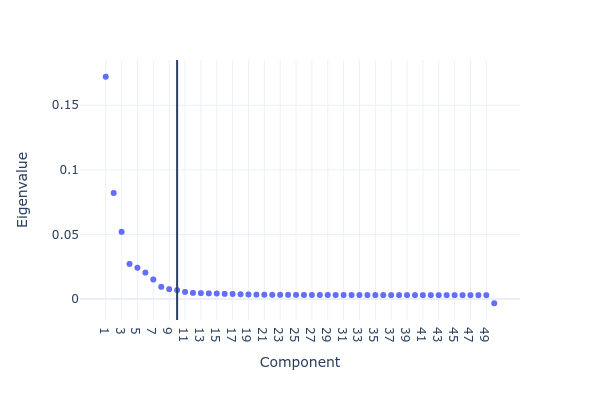

In [8]:
snap.pl.spectral_eigenvalues(data, interactive=False)

In [9]:
snap.tl.umap(data, use_dims = 10)

/home/yangli/apps/anaconda3/envs/SnapATAC2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


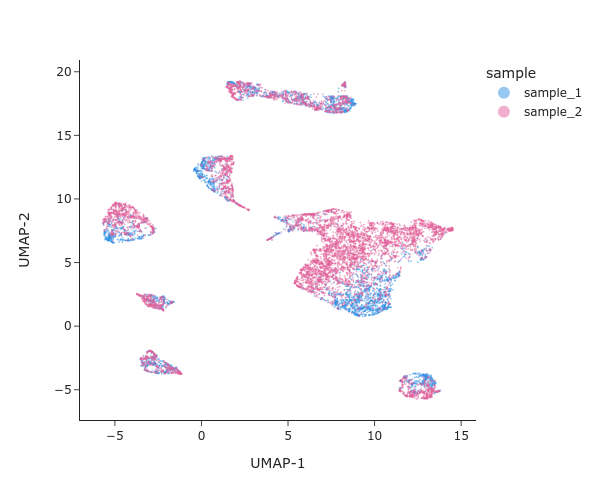

In [10]:
snap.pl.umap(data, color="sample", interactive=False, width = 600)

## Batch correction

From the UMAP plot above we can clearly see some donor/individual specific effects. Although these differences are interesting to study on their own, it obscures the clustering procedure for identifying shared cell states across individuals.

Here we apply one approaches called ***Harmony***, to remove donor specific differences. Click [here](https://www.nature.com/articles/s41592-019-0619-0) for more details about this algorithm. 

In [11]:
snap.pp.harmony(data, 
                batch="sample", 
                use_dims = 10, 
                max_iter_harmony = 20
               )

2022-11-18 10:42:46,982 - harmonypy - INFO - Iteration 1 of 20
2022-11-18 10:42:46 - INFO - Iteration 1 of 20
2022-11-18 10:42:49,227 - harmonypy - INFO - Iteration 2 of 20
2022-11-18 10:42:49 - INFO - Iteration 2 of 20
2022-11-18 10:42:51,441 - harmonypy - INFO - Iteration 3 of 20
2022-11-18 10:42:51 - INFO - Iteration 3 of 20
2022-11-18 10:42:53,759 - harmonypy - INFO - Iteration 4 of 20
2022-11-18 10:42:53 - INFO - Iteration 4 of 20
2022-11-18 10:42:56,138 - harmonypy - INFO - Iteration 5 of 20
2022-11-18 10:42:56 - INFO - Iteration 5 of 20
2022-11-18 10:42:58,601 - harmonypy - INFO - Iteration 6 of 20
2022-11-18 10:42:58 - INFO - Iteration 6 of 20
2022-11-18 10:43:01,070 - harmonypy - INFO - Iteration 7 of 20
2022-11-18 10:43:01 - INFO - Iteration 7 of 20
2022-11-18 10:43:03,554 - harmonypy - INFO - Iteration 8 of 20
2022-11-18 10:43:03 - INFO - Iteration 8 of 20
2022-11-18 10:43:06,000 - harmonypy - INFO - Iteration 9 of 20
2022-11-18 10:43:06 - INFO - Iteration 9 of 20
2022-11-18

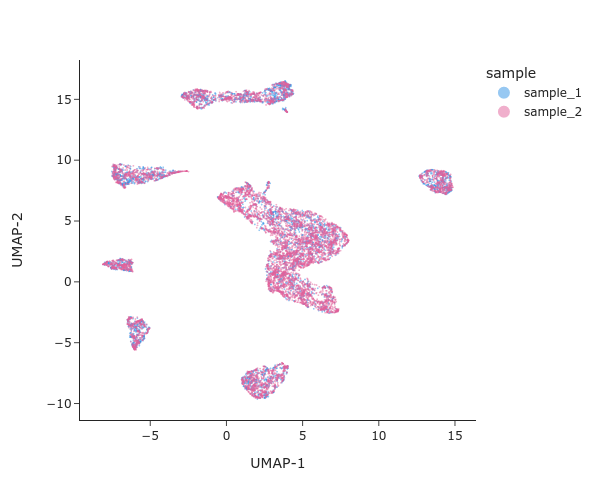

In [12]:
snap.tl.umap(data, use_rep="X_spectral_harmony")
snap.pl.umap(data, color="sample", interactive=False, width=600)

In [13]:
snap.pp.knn(data, use_rep="X_spectral_harmony", use_dims = 10)

In [14]:
snap.tl.leiden(data, resolution = 0.2)

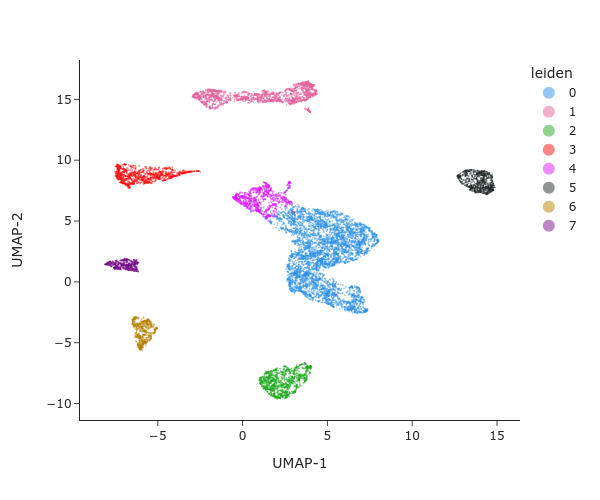

In [15]:
snap.pl.umap(data, color="leiden", interactive=False, width=600)

In [16]:
data.close()
data

Closed AnnDataSet object